Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando

In [ ]:
data = 'MICRODADOS_ENEM_2023.csv'
df = pd.read_csv(data, encoding='latin1', sep=';')


Dicionário que vai ser usado

In [ ]:
dic = {
    'SG_UF_PROVA': 'estado',
    'TP_ESCOLA': 'tipo_escola',
    'NU_NOTA_CN': 'CN',
    'NU_NOTA_CH': 'CH',
    'NU_NOTA_LC': 'LC',
    'NU_NOTA_MT': 'MAT',
    'NU_NOTA_REDACAO': 'REDA'
}
df = df.rename(columns=dic)

Análise 1: Média x Estado

Tirando a média

In [ ]:
df['media'] = df[['CN', 'CH', 'LC', 'MAT', 'REDA']].mean(axis=1)

Fazendo média x estado

In [ ]:
media_estado = df.groupby('estado')['media'].mean().reset_index()
media_estado = media_estado.sort_values(by='media', ascending=True)

Gráfico

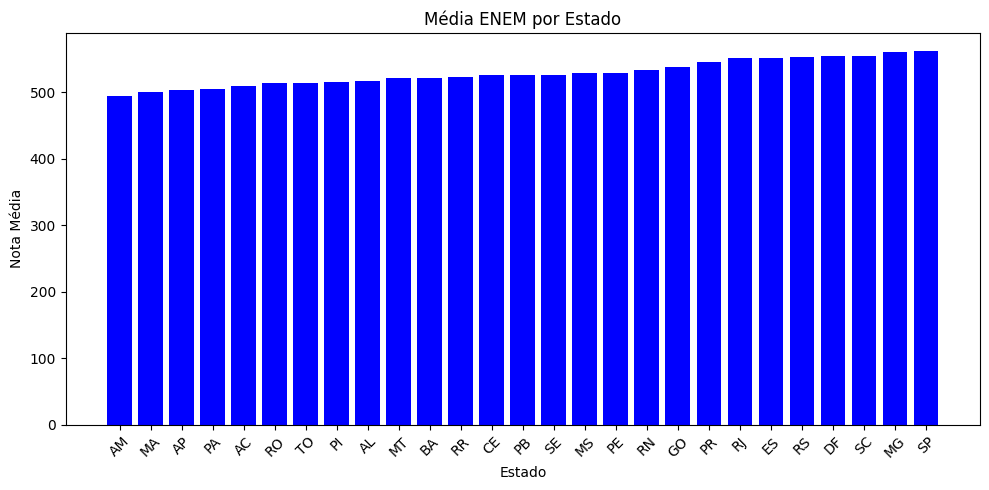

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(media_estado['estado'], media_estado['media'], color='blue')
plt.title('Média ENEM por Estado')
plt.xlabel('Estado')
plt.ylabel('Nota Média')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Análise 2: Média x Faixa Etária

Organizando para o padrão do INEP

In [ ]:
faixa_dic = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 a 25 anos',
    10: '26 a 30 anos',
    11: '31 a 35 anos',
    12: '36 a 40 anos',
    13: '41 a 45 anos',
    14: '46 a 50 anos',
    15: '51 a 55 anos',
    16: '56 a 60 anos',
    17: 'Mais de 60 anos'
}

df['faixa_etaria_legenda'] = df['TP_FAIXA_ETARIA'].map(faixa_dic)

Tirando a média

In [ ]:
media_faixa = df.groupby('faixa_etaria_legenda')['media'].mean().reset_index()

Ordenando

In [ ]:
ordem = list(faixa_dic.values())
media_faixa['faixa_etaria_legenda'] = pd.Categorical(media_faixa['faixa_etaria_legenda'], categories=ordem, ordered=True)
media_faixa = media_faixa.sort_values('faixa_etaria_legenda')

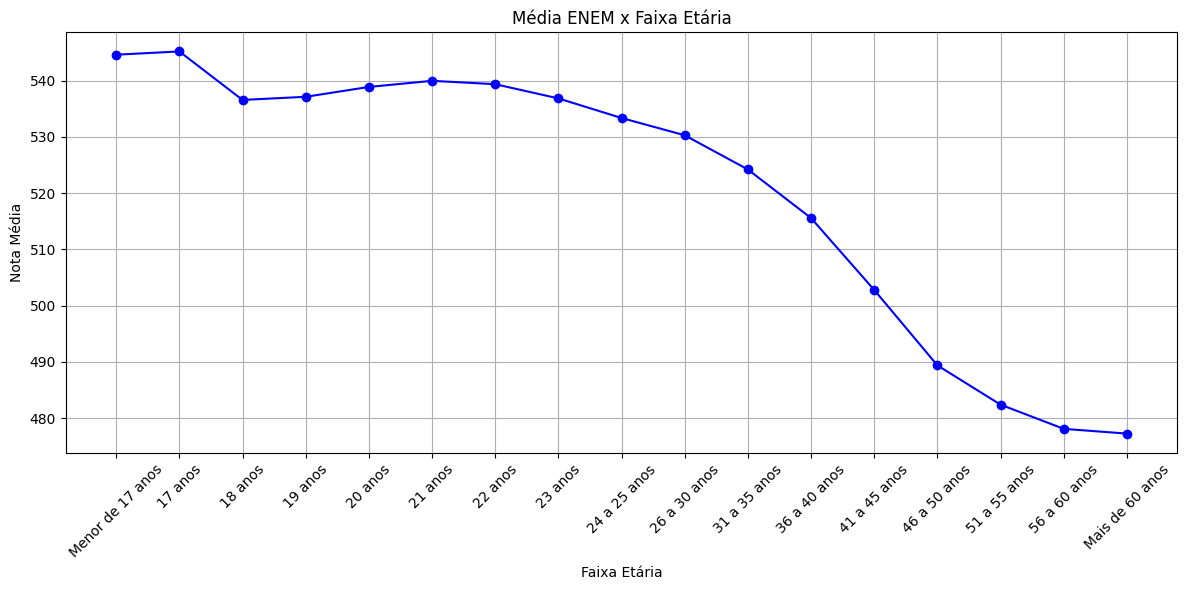

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(media_faixa['faixa_etaria_legenda'], media_faixa['media'], marker='o', color='blue')
plt.title('Média ENEM por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Nota Média')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Análise 3: Média x Tipo de Escola

Dicionário

In [ ]:
tipo_escola_dic = {
    1: 'Pública',
    2: 'Particular'
}

df['tipo_escola'] = df['tipo_escola'].map(tipo_escola_dic)

Removendo as notas faltantes

In [ ]:
df_limpo = df.dropna(subset=['CN', 'CH', 'LC', 'MAT', 'REDA'])

Calculando a média após remover

In [ ]:
df_limpo = df.dropna(subset=['CN', 'CH', 'LC', 'MAT', 'REDA']).copy()

Média por Escola

In [ ]:
media_escola = df_limpo.groupby('tipo_escola')['media'].mean().reset_index()

Gráfico

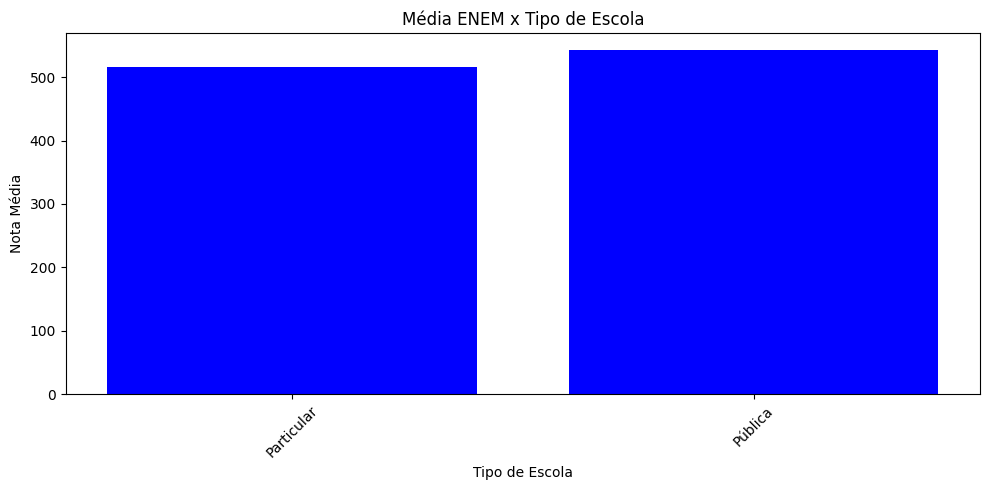

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(media_escola['tipo_escola'], media_escola['media'], color='blue')
plt.title('Média ENEM por Tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota Média')
plt.xticks(rotation=45)
plt.ylim(0)
plt.tight_layout()
plt.show()